In [1]:
import re
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from pandas import factorize
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
from datasist.structdata import detect_outliers
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV


warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("train.csv")
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


## Data Exploration:

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [4]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

Name                        9985
Monthly_Inhand_Salary      15002
Type_of_Loan               11408
Num_of_Delayed_Payment      7002
Num_Credit_Inquiries        1965
Credit_History_Age          9030
Amount_invested_monthly     4479
Monthly_Balance             1200
dtype: int64


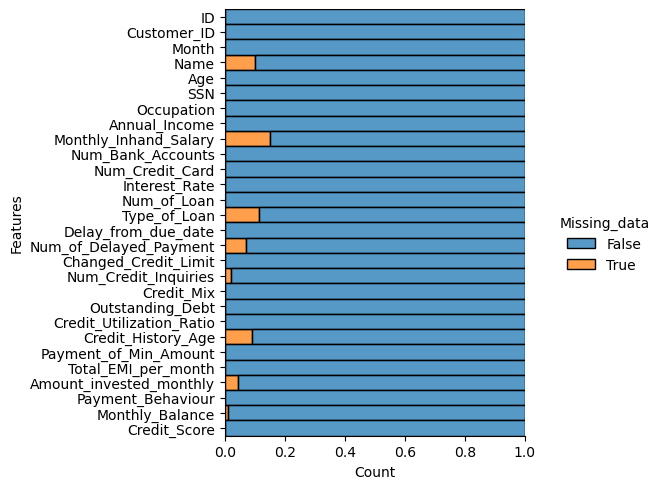

In [5]:
def na_ratio_plot(df):
    sns.displot(df.isna().melt(value_name='Missing_data',var_name='Features')\
                ,y='Features',hue='Missing_data',multiple='fill',aspect=9/8)

print(df.isna().sum()[df.isna().sum() > 0])
na_ratio_plot(df)

In [6]:
duplicates = df[df.duplicated()]
num_duplicates = duplicates.shape[0]

if num_duplicates == 0:
    print("There are no duplicates :D")
else:
    print("There are", num_duplicates, "duplicates.")

There are no duplicates :D


## Data Preprocessing:

In [7]:
df['Age'] = df['Age'].str.replace('_', '').astype(float)

In [8]:
df['Annual_Income'] = df['Annual_Income'].str.replace('_', '').astype(float)
unique_ssns = df['SSN'].unique()

for ssn in unique_ssns:
    monthly_sal = df.loc[df['SSN'] == ssn, 'Monthly_Inhand_Salary'].dropna().iloc[0]
    df.loc[df['SSN'] == ssn, 'Monthly_Inhand_Salary'] = monthly_sal

In [9]:
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].fillna(df['Annual_Income'] / 12)

In [10]:
def fill_occupation_by_ssn(df):
    df['Occupation'] = df['Occupation'].replace('_______', np.nan)
    
                                                         # finding the most recurring values for each SNN number
    most_common_occupation_by_ssn = df.groupby('SSN')['Occupation'].apply(lambda x: x.mode().iloc[0])
    
    for index, row in df.iterrows():
        if pd.isnull(row['Occupation']) and row['SSN'] in most_common_occupation_by_ssn:
            df.at[index, 'Occupation'] = most_common_occupation_by_ssn[row['SSN']]


fill_occupation_by_ssn(df)

In [11]:
df['Num_of_Loan'] = df['Num_of_Loan'].str.replace('_', '').astype(float)
df['Type_of_Loan'] = df.apply(lambda row: 'None' if row['Num_of_Loan'] < 0 else row['Type_of_Loan'], axis=1)

condition = (df['Type_of_Loan'].isnull()) & (df['Num_of_Loan'] == 0)
df.loc[condition, 'Type_of_Loan'] = 'None'

In [12]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace('_', '').astype(float)

In [13]:
df['Monthly_Balance'] = df['Monthly_Balance'].str.replace('_', '').astype(float)

In [14]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].str.replace('_', '0').astype(float)

In [15]:
df['Credit_Mix'] = df['Credit_Mix'].str.replace('_', 'None')

In [ ]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace('_', '').astype(float)

def knn_impute_column(df, column_name, n_neighbors=5):
    df_numeric = df.select_dtypes(include=[float, int]).copy()
    
    if column_name not in df_numeric.columns:
        raise ValueError(f"{column_name} is not numeric or not present in the DataFrame.")

    imputer = KNNImputer(n_neighbors=n_neighbors)
    df_imputed = imputer.fit_transform(df_numeric)

    df_imputed = pd.DataFrame(df_imputed, columns=df_numeric.columns)
    
    df[column_name] = df_imputed[column_name]
    return df

df = knn_impute_column(df, 'Num_of_Delayed_Payment')

In [ ]:
df['Num_Credit_Inquiries'] = df.apply(lambda row: 0 if row['Num_of_Loan'] < 0 else row['Num_Credit_Inquiries'], axis=1)

condition = (df['Num_Credit_Inquiries'].isnull()) & (df['Num_of_Loan'] == 0)
df.loc[condition, 'Num_Credit_Inquiries'] = 0

In [ ]:
mode_by_credit_mix = df.groupby('Credit_Mix')['Credit_History_Age'].transform(lambda x: x.mode()[0])
df['Credit_History_Age'].fillna(mode_by_credit_mix, inplace=True)

In [ ]:
df['Changed_Credit_Limit'].astype(float)
df.drop(df[df['Num_Bank_Accounts'] < 0].index, inplace=True)

In [ ]:
df['Credit_History_Age'] = df['Credit_History_Age'].str.extract('(\d+)').astype(int)

In [ ]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.replace('_', '')
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype(float)
df = knn_impute_column(df, 'Amount_invested_monthly')

In [ ]:
df = df.drop(['ID','Customer_ID','Month','Name','SSN'], axis = 1)

In [ ]:
df.isna().sum()

In [24]:
df.head(50)

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,None,809.98,26.822620,22,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,...,Good,809.98,31.944960,30,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,-500.0,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,Good,809.98,28.609352,22,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,...,Good,809.98,31.377862,22,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,...,Good,809.98,24.797347,22,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,...,Good,809.98,27.262259,22,No,49.574949,62.430172,!@9#%8,340.479212,Good
6,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,Good,809.98,22.537593,22,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
7,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,Good,809.98,23.933795,30,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard
8,28.0,Teacher,34847.84,3037.986667,2,4,6,1.0,Credit-Builder Loan,3,...,Good,605.03,24.464031,26,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard
9,28.0,Teacher,34847.84,3037.986667,2,4,6,1.0,Credit-Builder Loan,7,...,Good,605.03,38.550848,26,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good


### Dropping remaining NaN values (~4% of the dataset):

In [25]:
df = df.dropna()
df.isna().sum()

Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

## EDA:

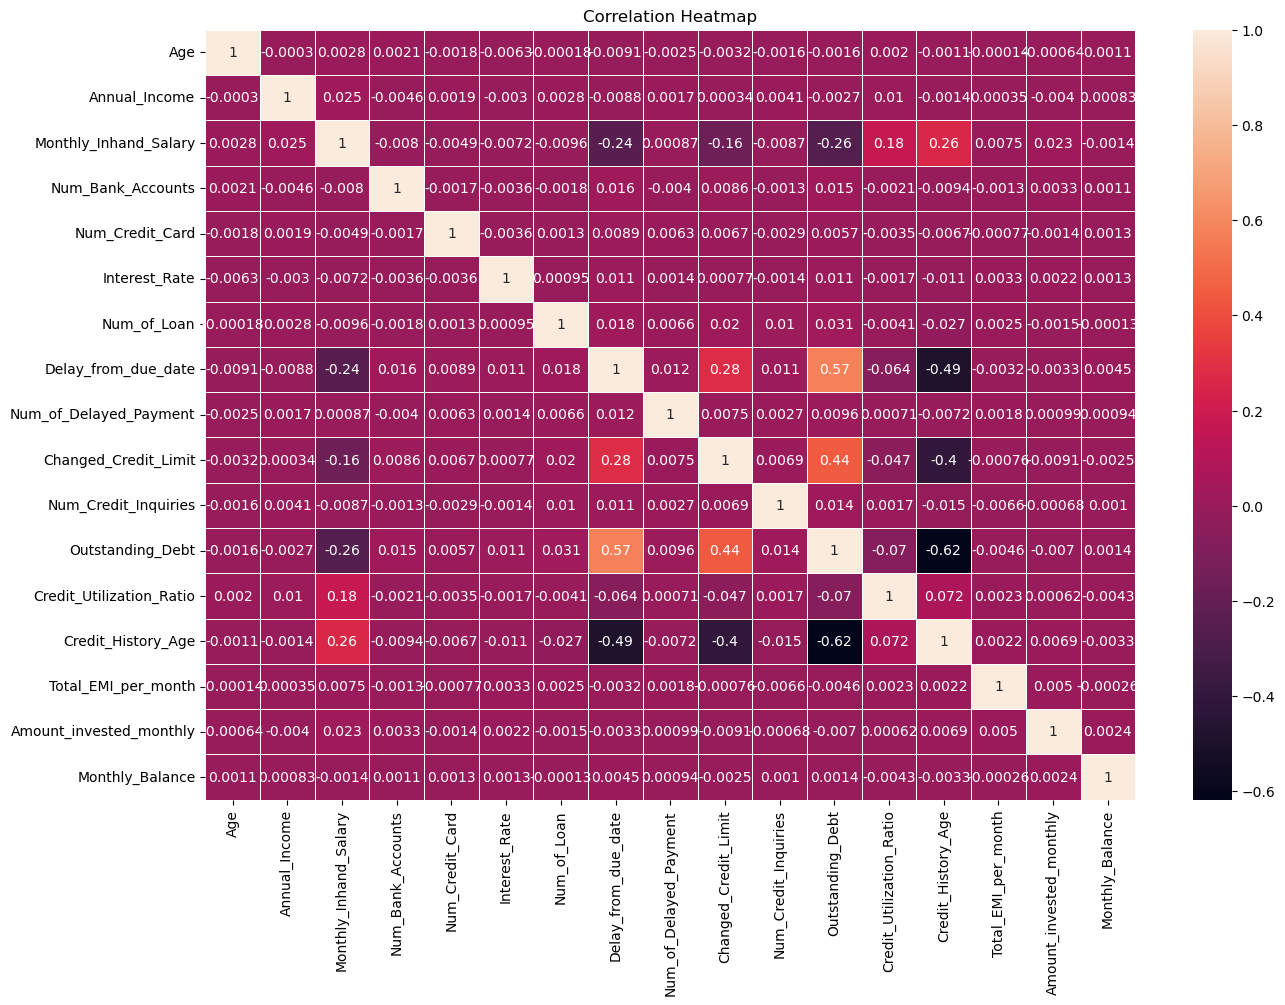

In [26]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

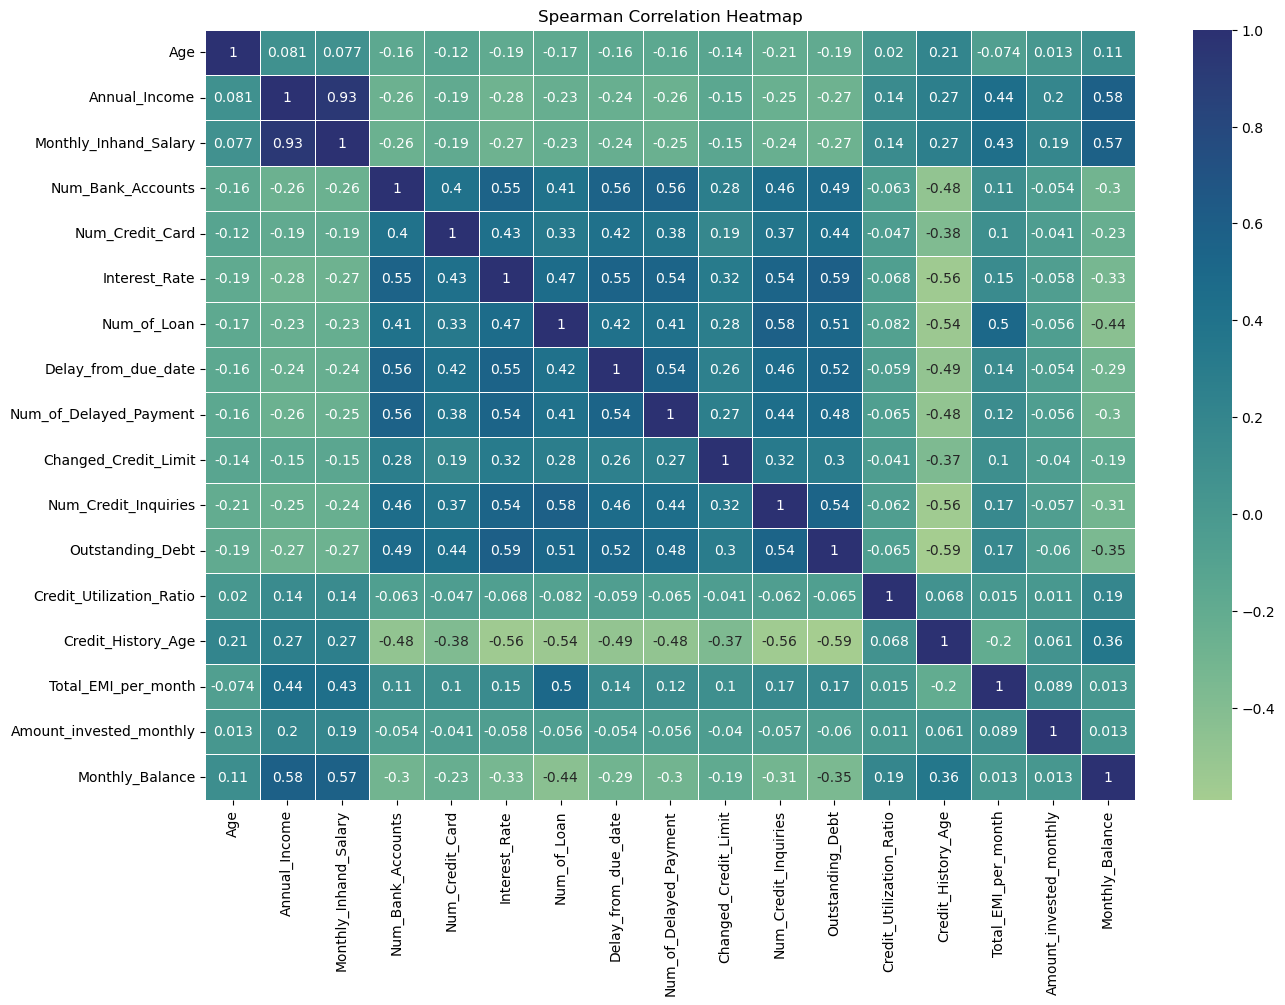

In [27]:
spearman_corr_matrix = df.corr(method='spearman')

plt.figure(figsize=(15, 10))
sns.heatmap(spearman_corr_matrix, annot=True, cmap='crest', linewidths=0.5)
plt.title("Spearman Correlation Heatmap")
plt.show()

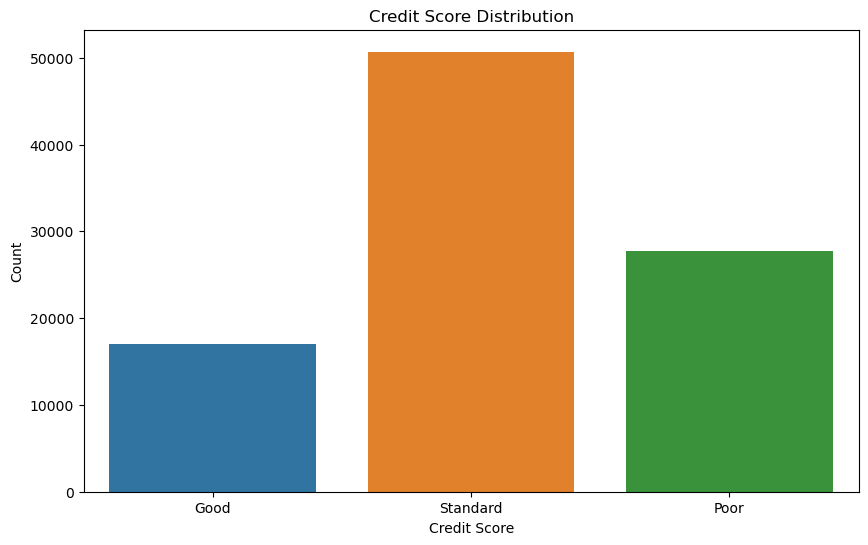

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Credit_Score')
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.show()

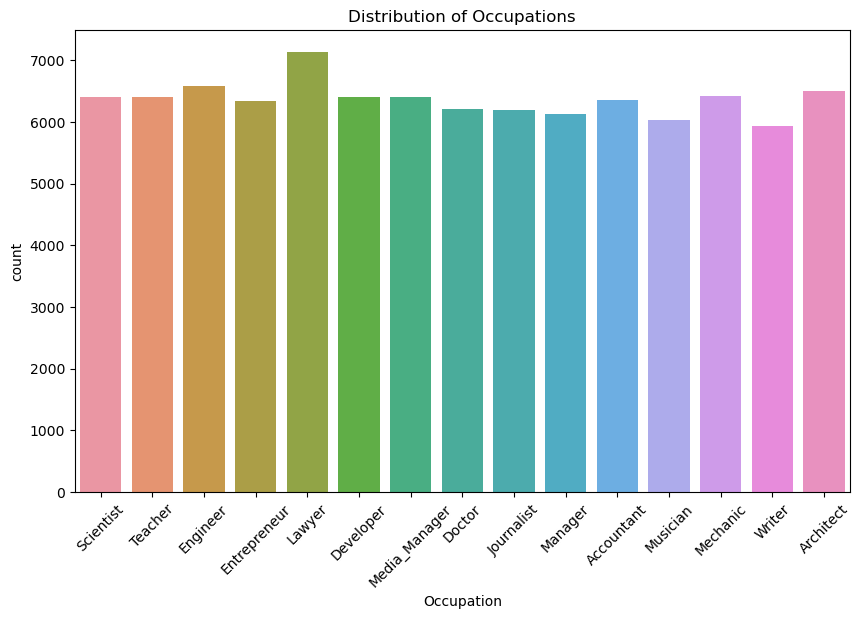

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Occupation', data=df)
plt.title("Distribution of Occupations")
plt.xticks(rotation=45)
plt.show()

<Axes: title={'center': 'Occupation Distribution'}, ylabel='Occupation'>

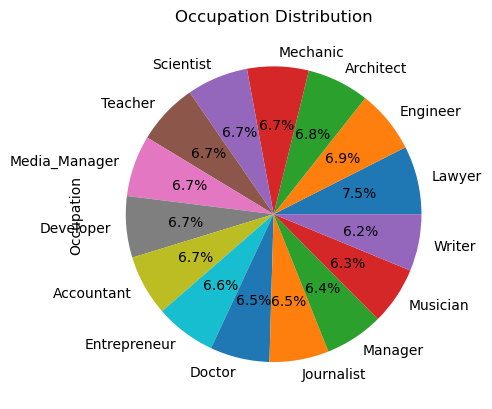

In [30]:
df['Occupation'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Occupation Distribution')

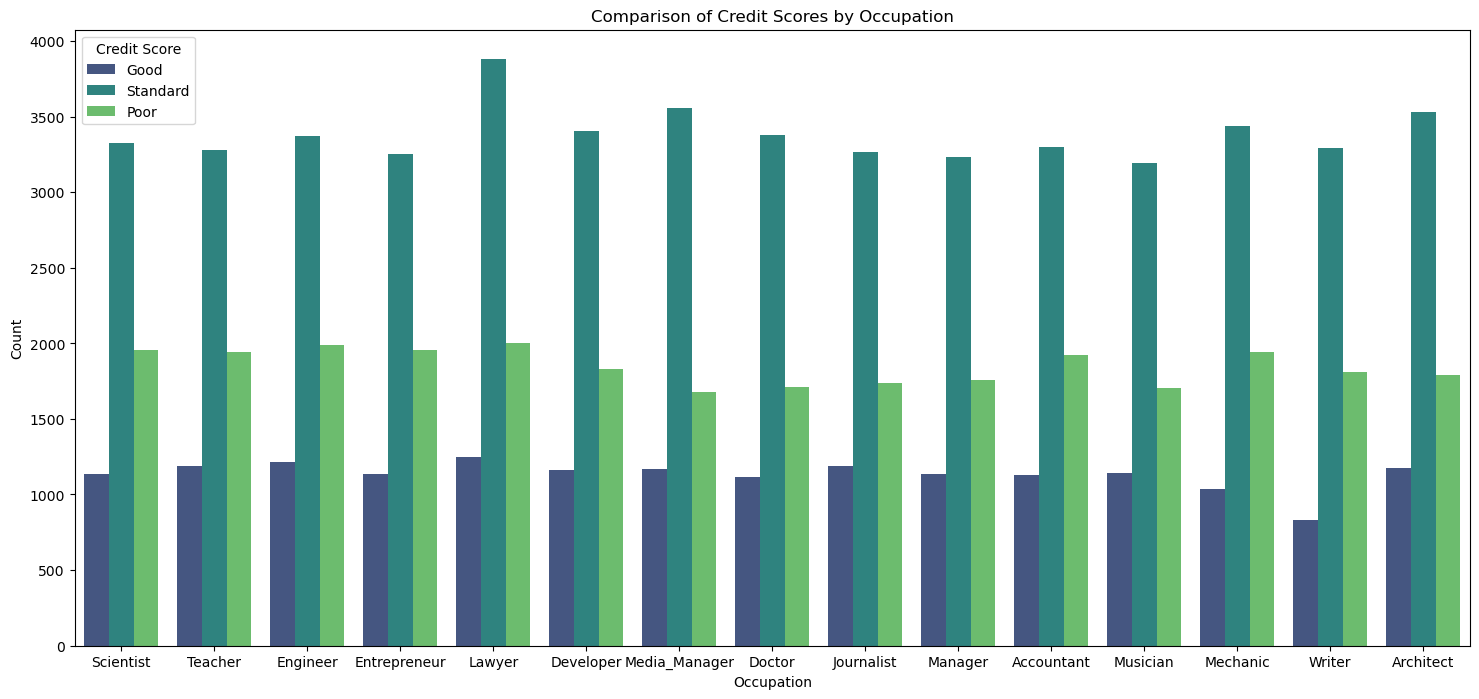

In [31]:
plt.figure(figsize=(18, 8))
sns.countplot(data=df, x='Occupation', hue='Credit_Score', palette='viridis')
plt.title('Comparison of Credit Scores by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.legend(title='Credit Score')
plt.show()

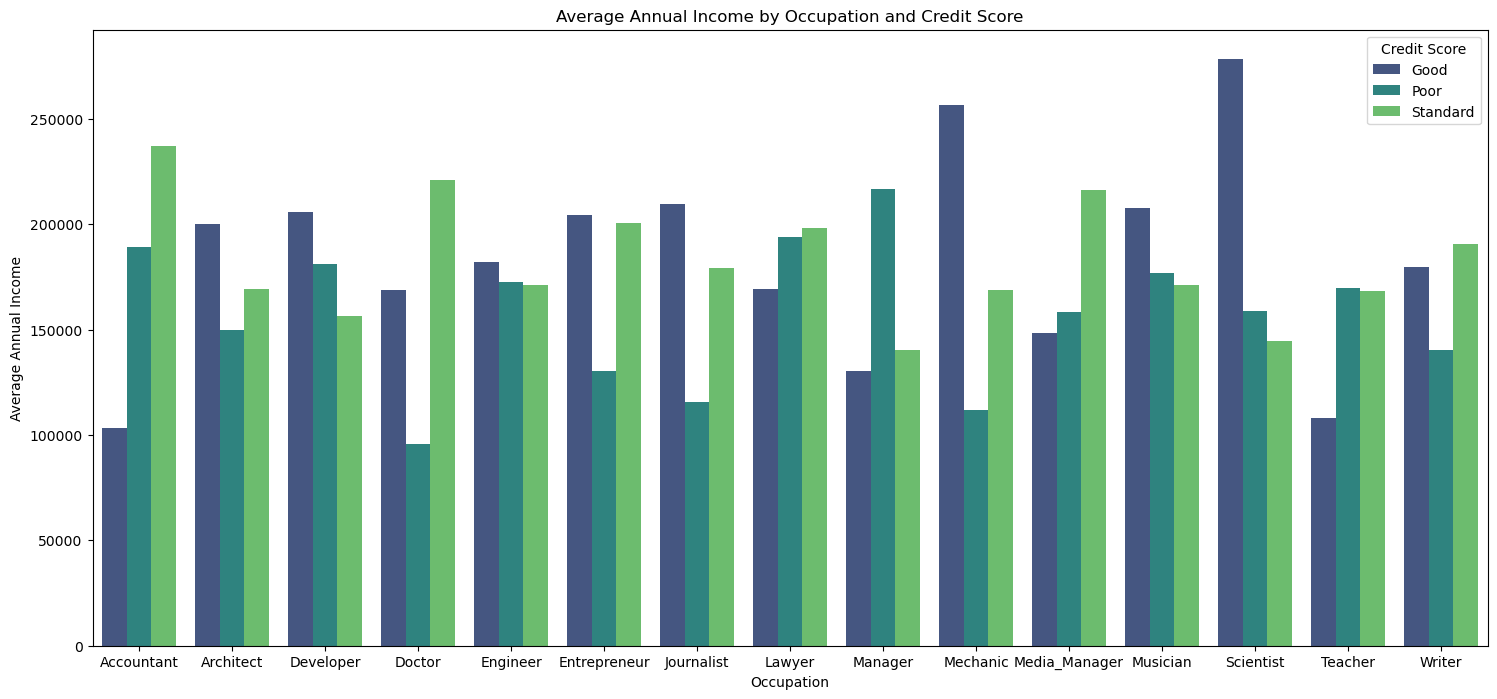

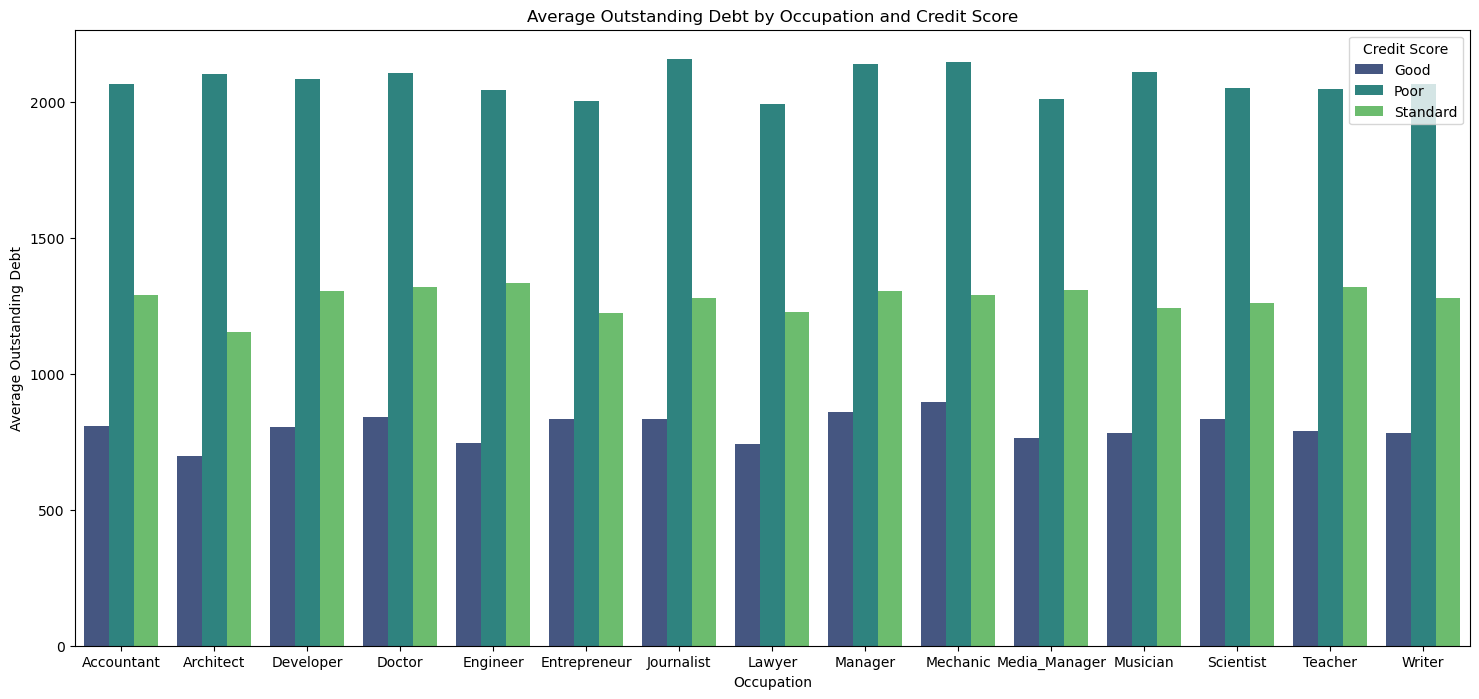

In [32]:
agg_df = df.groupby(['Occupation', 'Credit_Score']).agg({
    'Annual_Income': 'mean',
    'Outstanding_Debt': 'mean'
}).reset_index()


plt.figure(figsize=(18, 8))
sns.barplot(data=agg_df, x='Occupation', y='Annual_Income', hue='Credit_Score', palette='viridis')
plt.title('Average Annual Income by Occupation and Credit Score')
plt.xlabel('Occupation')
plt.ylabel('Average Annual Income')
plt.legend(title='Credit Score')
plt.show()

plt.figure(figsize=(18, 8))
sns.barplot(data=agg_df, x='Occupation', y='Outstanding_Debt', hue='Credit_Score', palette='viridis')
plt.title('Average Outstanding Debt by Occupation and Credit Score')
plt.xlabel('Occupation')
plt.ylabel('Average Outstanding Debt')
plt.legend(title='Credit Score')
plt.show()

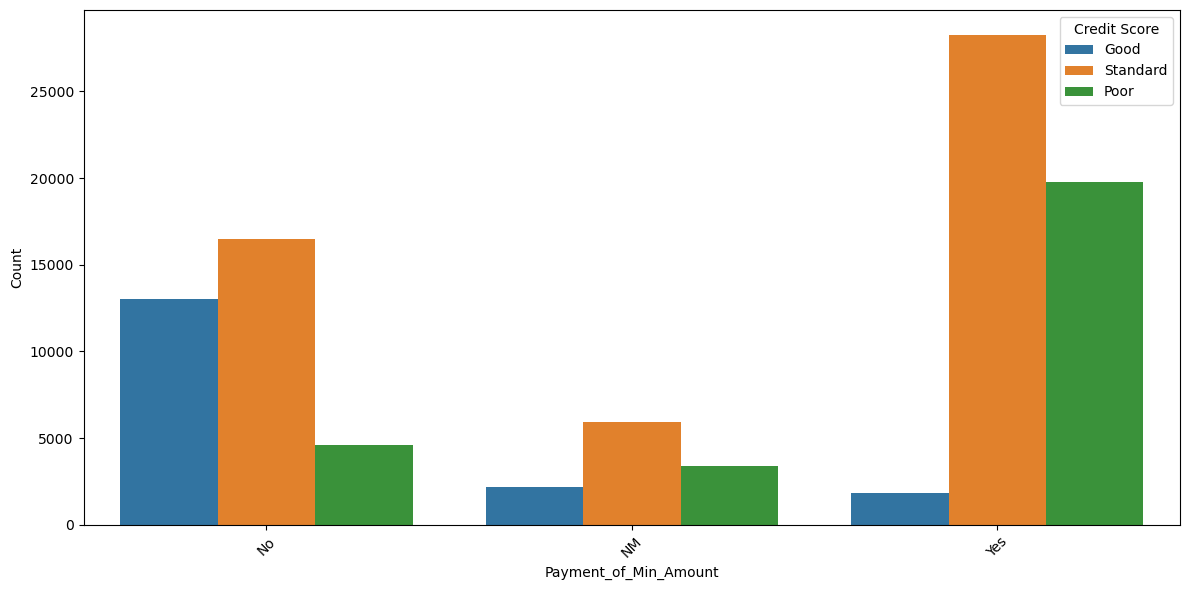

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


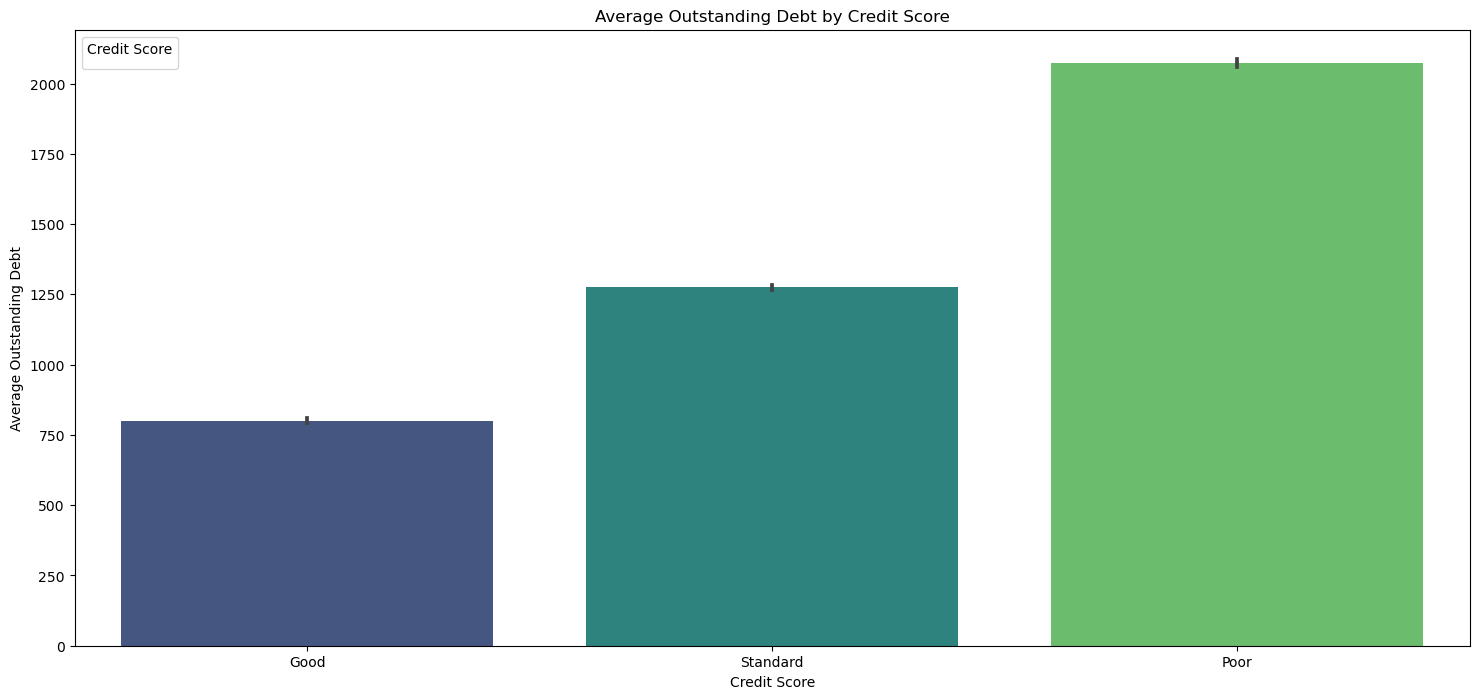

In [33]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Payment_of_Min_Amount', hue='Credit_Score', data=df)
plt.xlabel('Payment_of_Min_Amount')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Credit Score')
plt.tight_layout()
plt.show()
    
# Plotting the average Outstanding Debt by Credit Score
plt.figure(figsize=(18, 8))
sns.barplot(data=df, x='Credit_Score', y='Outstanding_Debt', palette='viridis')
plt.title('Average Outstanding Debt by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Average Outstanding Debt')
plt.legend(title='Credit Score')
plt.show()

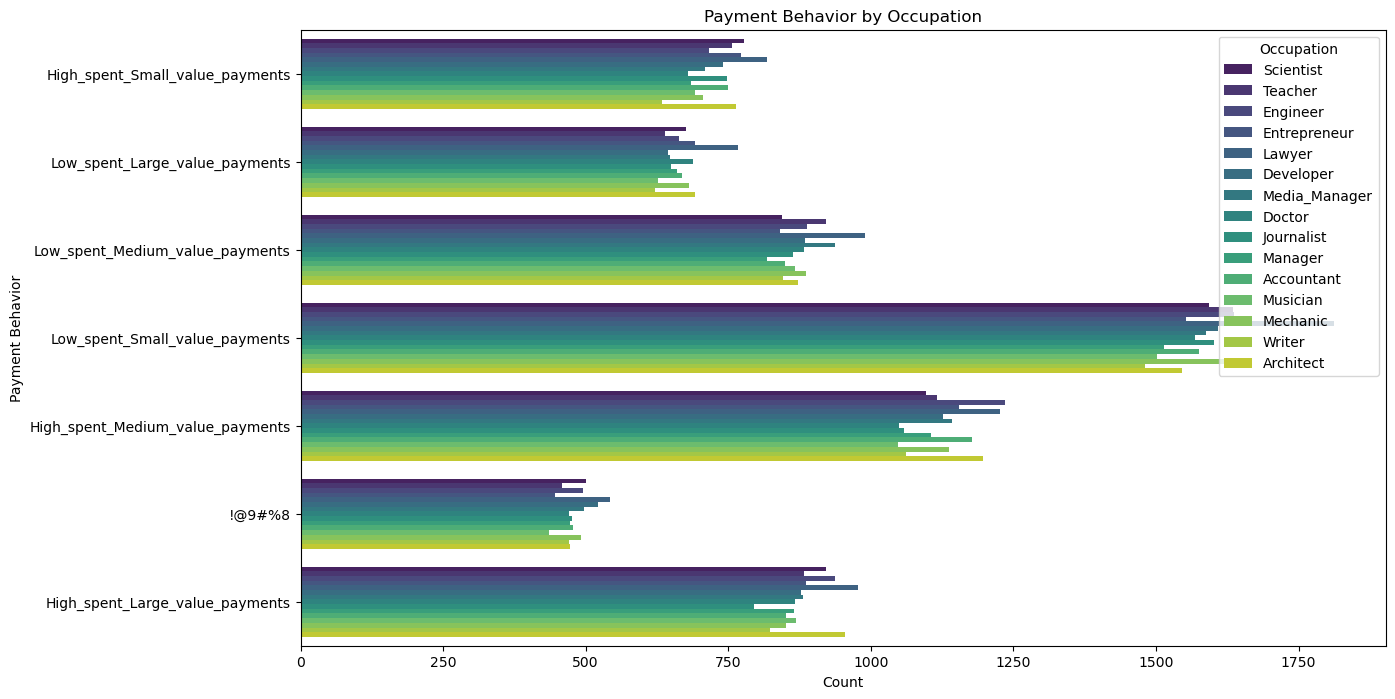

In [34]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, y='Payment_Behaviour', hue='Occupation', palette='viridis')
plt.title('Payment Behavior by Occupation')
plt.xlabel('Count')
plt.ylabel('Payment Behavior')
plt.legend(title='Occupation')
plt.show()

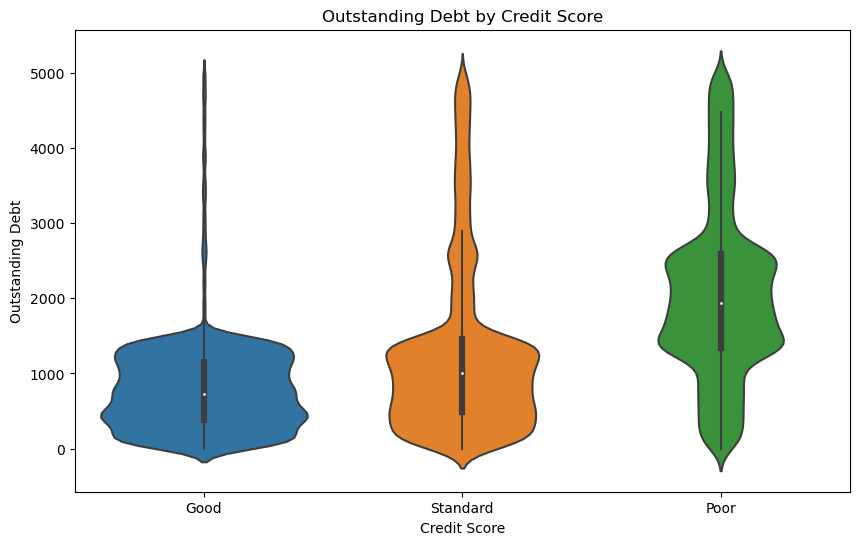

In [35]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Credit_Score', y='Outstanding_Debt', data=df)
plt.title("Outstanding Debt by Credit Score")
plt.xlabel("Credit Score")
plt.ylabel("Outstanding Debt")
plt.show()

<Axes: title={'center': 'Salary vs. EMI'}, xlabel='Monthly_Inhand_Salary', ylabel='Total_EMI_per_month'>

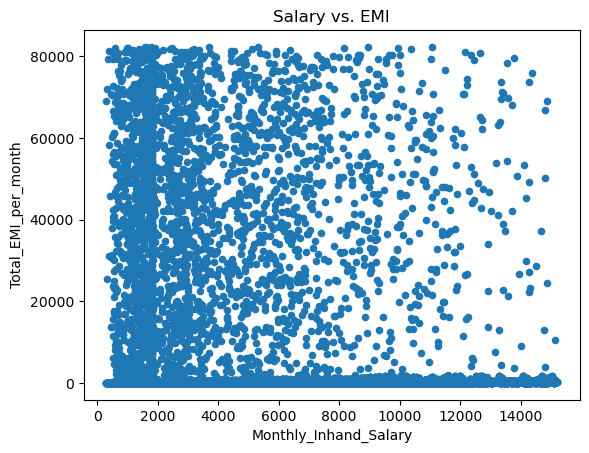

In [36]:
df.plot.scatter(x='Monthly_Inhand_Salary', y='Total_EMI_per_month', title='Salary vs. EMI')

Cramér's V between Occupation and Credit_Score: 0.027713847935040916


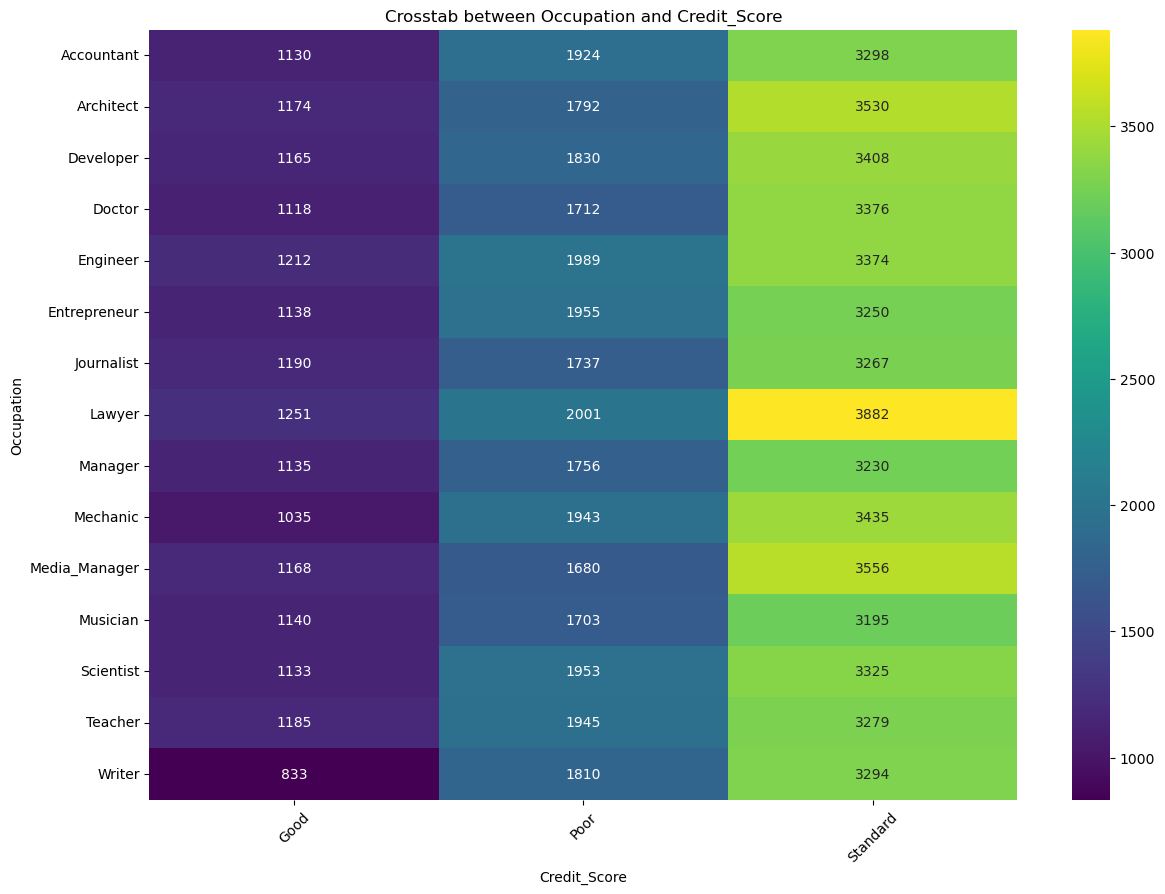

In [37]:
def cramers_v(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


confusion_matrix = pd.crosstab(df['Occupation'], df['Credit_Score'])

cramers_v_value = cramers_v(confusion_matrix)
print(f"Cramér's V between Occupation and Credit_Score: {cramers_v_value}")

plt.figure(figsize=(14, 10))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='viridis', cbar=True)
plt.title("Crosstab between Occupation and Credit_Score")
plt.xlabel("Credit_Score")
plt.ylabel("Occupation")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [38]:
df['Type_of_Loan'] = df['Type_of_Loan'].str.replace(' and ', ' ').str.split(', ')
df['Type_of_Loan'] = df['Type_of_Loan'].apply(lambda x: list(set(x)))
df['Type_of_Loan'] = df['Type_of_Loan'].apply(lambda x: ', '.join(sorted(x)))

loan_types = df['Type_of_Loan'].str.get_dummies(sep=', ')

df = pd.concat([df, loan_types], axis=1)

credit_score_encoded = LabelEncoder().fit_transform(df['Credit_Score'])
df['Credit_Score_Encoded'] = credit_score_encoded

cramers_v_values = {}
for loan_type in loan_types.columns:
    confusion_matrix = pd.crosstab(df[loan_type], df['Credit_Score_Encoded'])
    cramers_v_values[loan_type] = cramers_v(confusion_matrix)

for loan_type, cramers_v_value in cramers_v_values.items():
    print(f"Cramér's V between {loan_type} and Credit_Score: {cramers_v_value}")

Cramér's V between Auto Loan and Credit_Score: 0.1466926103108134
Cramér's V between Credit-Builder Loan and Credit_Score: 0.1376076097449813
Cramér's V between Debt Consolidation Loan and Credit_Score: 0.13899951066593227
Cramér's V between Home Equity Loan and Credit_Score: 0.1354638046461746
Cramér's V between Mortgage Loan and Credit_Score: 0.137397237892069
Cramér's V between None and Credit_Score: 0.13989112349143434
Cramér's V between Not Specified and Credit_Score: 0.1323719244683847
Cramér's V between Payday Loan and Credit_Score: 0.1381822323967285
Cramér's V between Personal Loan and Credit_Score: 0.13900645039917883
Cramér's V between Student Loan and Credit_Score: 0.13754195097611258


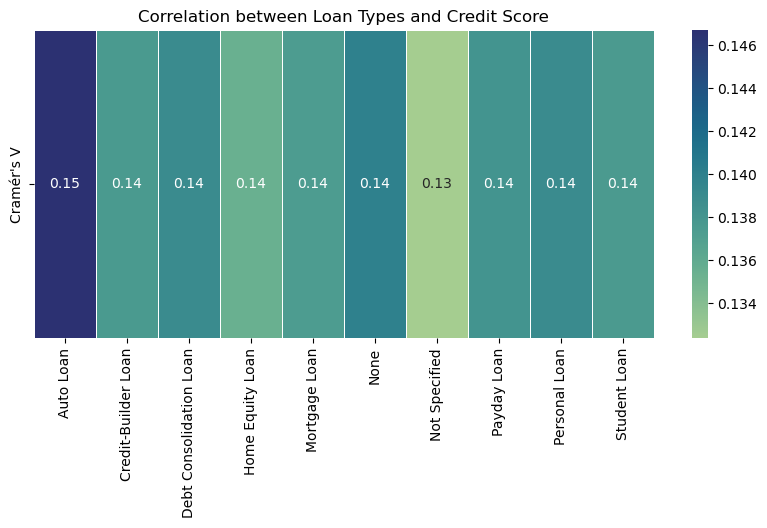

In [39]:
plt.figure(figsize=(10, 4))
sns.heatmap(pd.DataFrame.from_dict(cramers_v_values, orient='index', columns=['Cramér\'s V']).transpose(),
            annot=True, cmap='crest', linewidths=0.5)
plt.title("Correlation between Loan Types and Credit Score")
plt.show()

In [40]:
df = df.drop(['Type_of_Loan'], axis = 1)

In [41]:
labels, categories = factorize(df["Credit_Score"])
df["labels"] = labels

In [42]:
spearman_corr_annual_income, _ = spearmanr(df["Annual_Income"], df["labels"])
spearman_corr_annual_income = abs(spearman_corr_annual_income)
print(f"Spearman Correlation between Annual Income and Credit Score: {spearman_corr_annual_income:.4f}")

spearman_corr_monthly_income, _ = spearmanr(df["Monthly_Inhand_Salary"], df["labels"])
spearman_corr_monthly_income = abs(spearman_corr_monthly_income)
print(f"Spearman Correlation between Monthly Inhand Salary and Credit Score: {spearman_corr_monthly_income:.4f}")

Spearman Correlation between Annual Income and Credit Score: 0.2017
Spearman Correlation between Monthly Inhand Salary and Credit Score: 0.1973


In [43]:
df = df.drop(['Annual_Income', 'labels'], axis = 1)

## Feature Engineering:

#### Dropping outliers:

In [44]:
def non_numeric_values(df, column_name):
    pattern = r'\D+'
    
    non_numeric_values = df[column_name].astype(str).str.findall(pattern)
    non_numeric_values = [item for sublist in non_numeric_values for item in sublist]
    
    unique_non_numeric_values = set(non_numeric_values)
    return unique_non_numeric_values

In [45]:
non_numeric_values(df, 'Age')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

df.drop(df[df['Age'] > 100].index, inplace = True)
df.drop(df[df['Age'] < 0].index, inplace = True)

In [ ]:
non_numeric_values(df, 'Monthly_Inhand_Salary')
df['Monthly_Inhand_Salary'] = pd.to_numeric(df['Monthly_Inhand_Salary'], errors='coerce')

df[df['Monthly_Inhand_Salary'] < 0]['Monthly_Inhand_Salary'].count()
df.drop(df[df['Monthly_Inhand_Salary'] < 0].index, inplace=True)

In [47]:
non_numeric_values(df, 'Num_Credit_Card')
df['Num_Credit_Card'] = pd.to_numeric(df['Num_Credit_Card'], errors='coerce')

df.drop(df[df['Num_Credit_Card'] > 25].index, inplace = True)
df.drop(df[df['Num_Credit_Card'] < 0].index, inplace = True)

In [48]:
non_numeric_values(df, 'Interest_Rate')
df['Interest_Rate'] = pd.to_numeric(df['Interest_Rate'], errors='coerce')

df.drop(df[df['Interest_Rate'] > 100].index, inplace = True)
df.drop(df[df['Interest_Rate'] < 0].index, inplace = True)

In [49]:
non_numeric_values(df, 'Num_of_Loan')
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce')

df.drop(df[df['Num_of_Loan'] > 100].index, inplace = True)
df.drop(df[df['Num_of_Loan'] < 0].index, inplace = True)

In [50]:
non_numeric_values(df, 'Num_of_Delayed_Payment')
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')

df[df['Num_of_Delayed_Payment'] < 0]['Num_of_Delayed_Payment'].count()
df.drop(df[df['Num_of_Delayed_Payment'] < 0].index, inplace=True)

In [51]:
non_numeric_values(df, 'Changed_Credit_Limit')
df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce')

df[df['Changed_Credit_Limit'] < 0]['Changed_Credit_Limit'].count()
df.drop(df[df['Changed_Credit_Limit'] < 0].index, inplace=True)

In [52]:
non_numeric_values(df, 'Num_Credit_Inquiries')
df['Num_Credit_Inquiries'] = pd.to_numeric(df['Num_Credit_Inquiries'], errors='coerce')

df[df['Num_Credit_Inquiries'] < 0]['Num_Credit_Inquiries'].count()
df.drop(df[df['Num_Credit_Inquiries'] < 0].index, inplace=True)

In [53]:
non_numeric_values(df, 'Outstanding_Debt')
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'], errors='coerce')

df[df['Outstanding_Debt'] < 0]['Outstanding_Debt'].count()
df.drop(df[df['Outstanding_Debt'] < 0].index, inplace=True)

In [54]:
non_numeric_values(df, 'Credit_Utilization_Ratio')
df['Credit_Utilization_Ratio'] = pd.to_numeric(df['Credit_Utilization_Ratio'], errors='coerce')

df[df['Credit_Utilization_Ratio'] < 0]['Credit_Utilization_Ratio'].count()
df.drop(df[df['Credit_Utilization_Ratio'] < 0].index, inplace=True)

In [55]:
non_numeric_values(df, 'Total_EMI_per_month')
df['Total_EMI_per_month'] = pd.to_numeric(df['Total_EMI_per_month'], errors='coerce')

df[df['Total_EMI_per_month'] < 0]['Total_EMI_per_month'].count()
df.drop(df[df['Total_EMI_per_month'] < 0].index, inplace=True)

In [56]:
non_numeric_values(df, 'Amount_invested_monthly')
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')

df[df['Amount_invested_monthly'] < 0]['Amount_invested_monthly'].count()
df.drop(df[df['Amount_invested_monthly'] < 0].index, inplace=True)

In [57]:
non_numeric_values(df, 'Monthly_Balance')
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')

df[df['Monthly_Balance'] < 0]['Monthly_Balance'].count()
df.drop(df[df['Monthly_Balance'] < 0].index, inplace = True)

In [58]:
non_numeric_values(df, 'Num_Bank_Accounts')
df['Num_Bank_Accounts'] = pd.to_numeric(df['Num_Bank_Accounts'], errors='coerce')

df.drop(df[df['Num_Bank_Accounts'] > 100].index, inplace = True)
df.drop(df[df['Num_Bank_Accounts'] < 0].index, inplace = True)

#### New features:

In [59]:
df['Average_Loan_Amount'] = df['Outstanding_Debt'] / df['Num_of_Loan']

In [60]:
df['Income_Stability'] = df.groupby('Occupation')['Monthly_Inhand_Salary'].transform('std').fillna(0)

In [61]:
df['Loan_Age'] = df['Credit_History_Age'] - df['Num_of_Loan']

In [62]:
df['Total_Monthly_Obligations'] = df['Total_EMI_per_month'] + df['Outstanding_Debt'] / 12

In [63]:
df['Adjusted_Monthly_Balance'] = df['Monthly_Balance'] - df['Total_EMI_per_month']

In [64]:
df['Total_Credit_Accounts'] = df['Num_Bank_Accounts'] + df['Num_Credit_Card']

In [65]:
df['Total_Loans'] = df['Num_of_Loan'] + df['Num_of_Delayed_Payment']

In [66]:
df['Average_Loan_Age'] = df['Credit_History_Age'] / df['Num_of_Loan']

In [67]:
df['Investment_Over_Time'] = df['Amount_invested_monthly'].cumsum()

In [68]:
df['Income_Change'] = df['Monthly_Inhand_Salary'] - df['Amount_invested_monthly']

In [69]:
df['Loan_Count_per_Credit_Account'] = df['Num_of_Loan'] / (df['Num_Bank_Accounts'] + df['Num_Credit_Card'])

In [70]:
df['Total_Monthly_Obligations'] = df['Total_EMI_per_month'] + df['Amount_invested_monthly']

In [71]:
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_features = poly.fit_transform(df[['Age', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate']])
poly_feature_names = poly.get_feature_names_out(['Age', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate'])
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)

In [72]:
df['Log_Income'] = np.log1p(df['Monthly_Inhand_Salary'])
df['Log_Debt'] = np.log1p(df['Outstanding_Debt'])

In [73]:
df['Income_Age_Interaction'] = df['Monthly_Inhand_Salary'] * df['Age']

In [74]:
df['Sqrt_Income'] = np.sqrt(df['Monthly_Inhand_Salary'])

In [75]:
df['Debt_to_Income_Ratio'] = df['Outstanding_Debt'] / df['Monthly_Inhand_Salary']

In [76]:
df['Income_to_Age_Ratio'] = df['Monthly_Inhand_Salary'] / df['Age']

In [77]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", categorical_columns)

Categorical columns: ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']


In [78]:
df

,Age,Occupation,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Average_Loan_Age,Investment_Over_Time,Income_Change,Loan_Count_per_Credit_Account,Log_Income,Log_Debt,Income_Age_Interaction,Sqrt_Income,Debt_to_Income_Ratio,Income_to_Age_Ratio
0,23.0,Scientist,1824.843333,3,4,3,4.0,3,7.0,11.27,...,5.5,8.041530e+01,1744.428038,0.571429,7.509797,6.698243,41971.396667,42.718185,0.443863,79.341014
1,23.0,Scientist,1824.843333,3,4,3,4.0,-1,5.8,11.27,...,7.5,1.986955e+02,1706.563112,0.571429,7.509797,6.698243,41971.396667,42.718185,0.443863,79.341014
3,23.0,Scientist,1824.843333,3,4,3,4.0,5,4.0,6.27,...,5.5,3.981536e+02,1625.385259,0.571429,7.509797,6.698243,41971.396667,42.718185,0.443863,79.341014
4,23.0,Scientist,1824.843333,3,4,3,4.0,6,344.8,11.27,...,5.5,4.395737e+02,1783.423180,0.571429,7.509797,6.698243,41971.396667,42.718185,0.443863,79.341014
5,23.0,Scientist,1824.843333,3,4,3,4.0,8,4.0,9.27,...,5.5,5.020039e+02,1762.413161,0.571429,7.509797,6.698243,41971.396667,42.718185,0.443863,79.341014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98298,38.0,Lawyer,3152.962500,0,4,4,1.0,9,1.0,1.58,...,25.0,5.192071e+07,3106.256291,0.250000,8.056415,6.397596,119812.575000,56.151247,0.190107,82.972697
98299,38.0,Lawyer,3152.962500,0,4,4,1.0,9,1.0,1.58,...,25.0,5.192086e+07,2999.878847,0.250000,8.056415,6.397596,119812.575000,56.151247,0.190107,82.972697
98301,38.0,Lawyer,3152.962500,0,4,4,1.0,9,1.0,1.58,...,30.0,5.192089e+07,3123.027982,0.250000,8.056415,6.397596,119812.575000,56.151247,0.190107,82.972697
98302,38.0,Lawyer,3152.962500,0,4,4,1.0,9,3.0,2.58,...,25.0,5.192106e+07,2988.733054,0.250000,8.056415,6.397596,119812.575000,56.151247,0.190107,82.972697


## Model Training:

In [79]:
df.columns = df.columns.str.replace(' ', '_')

In [80]:
data = df.copy()

for col in categorical_columns:
    encoded_data = pd.get_dummies(data[col], prefix=col, drop_first=True)
    data = pd.concat([data, encoded_data], axis=1)
    data.drop(columns=[col], inplace=True)

In [81]:
data = data.drop(['Credit_Score_Poor', 'Credit_Score_Standard'], axis = 1)

In [82]:
def drop_infinite_columns(df):
    return df.loc[:, ~df.isin([np.inf, -np.inf]).any()]

def drop_large_value_columns(df, threshold=1e10):
    return df.loc[:, ~(df.abs() > threshold).any()]


data = drop_infinite_columns(data)
data = drop_large_value_columns(data)

#### XGBoost:

In [116]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier(
    random_state=20,
    max_depth=30, 
    n_estimators=1000,  
    learning_rate=0.09,
    colsample_bytree=0.85,  
    eval_metric='mlogloss',  
    use_label_encoder=False
)

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.15, random_state=24)

train_indices_list = []
test_indices_list = []

for train_index, test_index in sss.split(X, y):
    train_indices_list.append(train_index)
    test_indices_list.append(test_index)

X_train, X_test = X.iloc[train_indices_list[0]], X.iloc[test_indices_list[0]]
y_train, y_test = y.iloc[train_indices_list[0]], y.iloc[test_indices_list[0]]

xgb_classifier.fit(X_train, y_train)

y_pred_test = xgb_classifier.predict(X_test)
y_pred_train = xgb_classifier.predict(X_train)

accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Model accuracy on test data: {accuracy_test:.4f}")
print("\nClassification Report on test data:\n", classification_report(y_test, y_pred_test, target_names=['Good', 'Standard', 'Poor']))

accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Model accuracy on training data: {accuracy_train:.4f}")
print("\nClassification Report on training data:\n", classification_report(y_train, y_pred_train, target_names=['Good', 'Standard', 'Poor']))

Model accuracy on test data: 0.8014

Classification Report on test data:
               precision    recall  f1-score   support

        Good       0.77      0.75      0.76      2132
    Standard       0.79      0.82      0.80      3603
        Poor       0.82      0.81      0.82      6577

    accuracy                           0.80     12312
   macro avg       0.79      0.79      0.79     12312
weighted avg       0.80      0.80      0.80     12312

Model accuracy on training data: 1.0000

Classification Report on training data:
               precision    recall  f1-score   support

        Good       1.00      1.00      1.00     12083
    Standard       1.00      1.00      1.00     20414
        Poor       1.00      1.00      1.00     37270

    accuracy                           1.00     69767
   macro avg       1.00      1.00      1.00     69767
weighted avg       1.00      1.00      1.00     69767



#### Using Randomforest:

In [83]:
X = data.drop(columns=['Credit_Score_Encoded'])
y = data['Credit_Score_Encoded']

rf_classifier = RandomForestClassifier(random_state=20)
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.15, random_state=24)

train_indices_list = []
test_indices_list = []

for train_index, test_index in sss.split(X, y):
    train_indices_list.append(train_index)
    test_indices_list.append(test_index)

X_train, X_test = X.iloc[train_indices_list[0]], X.iloc[test_indices_list[0]]
y_train, y_test = y.iloc[train_indices_list[0]], y.iloc[test_indices_list[0]]

rf_classifier.fit(X_train, y_train)

y_pred_test = rf_classifier.predict(X_test)
y_pred_train = rf_classifier.predict(X_train)

In [84]:
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Model accuracy on training data: {accuracy_train:.4f}")
print("\nClassification Report on training data:\n", classification_report(y_train, y_pred_train, target_names=['Good', 'Standard', 'Poor']))

Model accuracy on training data: 1.0000

Classification Report on training data:
               precision    recall  f1-score   support

        Good       1.00      1.00      1.00     12083
    Standard       1.00      1.00      1.00     20414
        Poor       1.00      1.00      1.00     37270

    accuracy                           1.00     69767
   macro avg       1.00      1.00      1.00     69767
weighted avg       1.00      1.00      1.00     69767



In [85]:
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Model accuracy on test data: {accuracy_test:.4f}")
print("\nClassification Report on test data:\n", classification_report(y_test, y_pred_test, target_names=['Good', 'Standard', 'Poor']))

Model accuracy on test data: 0.8013

Classification Report on test data:
               precision    recall  f1-score   support

        Good       0.76      0.73      0.74      2132
    Standard       0.79      0.82      0.81      3603
        Poor       0.82      0.81      0.82      6577

    accuracy                           0.80     12312
   macro avg       0.79      0.79      0.79     12312
weighted avg       0.80      0.80      0.80     12312



#### Using GridSearchCV:

In [88]:
param_grid = {
    'max_depth': [5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy']
}

sss = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=24)

dt_classifier = DecisionTreeClassifier(random_state=20)
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=sss, scoring='accuracy', n_jobs=-1, verbose=2)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    grid_search.fit(X_train, y_train)

best_dt_classifier = grid_search.best_estimator_

y_pred_test = best_dt_classifier.predict(X_test)
y_pred_train = best_dt_classifier.predict(X_train)

Fitting 3 folds for each of 160 candidates, totalling 480 fits
Fitting 3 folds for each of 160 candidates, totalling 480 fits
Fitting 3 folds for each of 160 candidates, totalling 480 fits


In [92]:
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Best model accuracy on training data: {accuracy_train:.4f}")
print("\nClassification Report on training data:\n", classification_report(y_train, y_pred_train, target_names=['Good', 'Standard', 'Poor']))

Best model accuracy on training data: 0.8153

Classification Report on training data:
               precision    recall  f1-score   support

        Good       0.67      0.80      0.73     11967
    Standard       0.84      0.83      0.83     19950
        Poor       0.86      0.81      0.84     36370

    accuracy                           0.82     68287
   macro avg       0.79      0.81      0.80     68287
weighted avg       0.82      0.82      0.82     68287



In [89]:
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Best model accuracy on test data: {accuracy_test:.4f}")
print("\nClassification Report on test data:\n", classification_report(y_test, y_pred_test, target_names=['Good', 'Standard', 'Poor']))

Best model accuracy on test data: 0.7162

Classification Report on test data:
               precision    recall  f1-score   support

        Good       0.57      0.69      0.62      2992
    Standard       0.73      0.71      0.72      4987
        Poor       0.77      0.73      0.75      9093

    accuracy                           0.72     17072
   macro avg       0.69      0.71      0.70     17072
weighted avg       0.72      0.72      0.72     17072



#### Using random parameters for the model:

In [84]:
X = data.drop(columns=['Credit_Score_Encoded'])
y = data[['Credit_Score_Encoded']]

sss = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=24)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

dt_classifier = DecisionTreeClassifier(max_depth=10, random_state=20)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)

In [85]:
y_train_pred = dt_classifier.predict(X_train)
print("Accuracy:", accuracy_score(y_train, y_train_pred))

Accuracy: 0.7335327113928194


In [86]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Good', 'Poor', 'Standard']))

Accuracy: 0.7083854073677319

Classification Report:
               precision    recall  f1-score   support

        Good       0.59      0.62      0.60      2918
        Poor       0.73      0.66      0.69      4914
    Standard       0.74      0.76      0.75      8971

    accuracy                           0.71     16803
   macro avg       0.68      0.68      0.68     16803
weighted avg       0.71      0.71      0.71     16803



#### Baseline model:

In [ ]:
X = df.drop(columns=['Credit_Score'])
y = df['Credit_Score']

high_cardinality_features = identify_high_cardinality_features(X)
le = LabelEncoder()
for col in high_cardinality_features:
    X[col] = X[col].astype(str)
    X[col] = le.fit_transform(X[col])

X = pd.get_dummies(X, columns=[col for col in X.columns if col not in high_cardinality_features])

sss = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=24)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

dt_classifier = DecisionTreeClassifier(max_depth=10, random_state=20)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)

In [43]:
y_train_pred = dt_classifier.predict(X_train)
print("Accuracy:", accuracy_score(y_train, y_train_pred))

Accuracy: 0.7171871930858378


In [39]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Good', 'Poor', 'Standard']))

Accuracy: 0.6895034569453174

Classification Report:
               precision    recall  f1-score   support

        Good       0.58      0.61      0.60      3403
        Poor       0.69      0.64      0.66      5548
    Standard       0.73      0.74      0.73     10141

    accuracy                           0.69     19092
   macro avg       0.67      0.67      0.67     19092
weighted avg       0.69      0.69      0.69     19092

